# Data mining final project

## 1.Previewing data

### 1.1import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from mlxtend.feature_selection import SequentialFeatureSelector as sfs #stepwise
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,PolynomialFeatures
from sklearn.feature_selection import chi2,SelectKBest 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,AdaBoostClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,precision_recall_curve,roc_curve,auc
import seaborn as sns
sns.set(style="ticks")
from sklearn.linear_model import Ridge,RidgeCV
from io import StringIO
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats
sns.set(style="ticks")

### 1.2 Load  and preview data

In [4]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.head() #preview data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
data.drop(['url'],axis = 1,inplace= True) #excluding url

In [6]:
data.describe().iloc[:,0:11] #preview data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534


In [7]:
data.describe().iloc[:,11:21]

,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967
std,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000
50%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,660.000000,235.500000
75%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1000.000000,357.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,377.000000,298400.000000,42827.857143


In [8]:
data.describe().iloc[:,21:31]

,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020
std,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000
50%,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878,1200.000000,2800.000000,2200.000000,0.000000
75%,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,2600.000000,8000.000000,5200.000000,0.000000
max,843300.000000,843300.000000,843300.000000,3613.039820,298400.000000,43567.659946,843300.000000,843300.000000,843300.000000,1.000000


In [9]:
data.describe().iloc[:,31:41]

,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321
std,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033387,0.033345,0.040004
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240958,0.150831,0.334218
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.926994,0.925947,0.919999


In [10]:
data.describe().iloc[:,41:]

,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,0.040001,0.040727,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,0.375763,0.399986,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,0.926534,0.927191,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## 2. Data preprocessing

### 2.1 Eliminate highly correlated features

In [44]:
corr = data.corr()

In [45]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns] #drop highly correlated columns

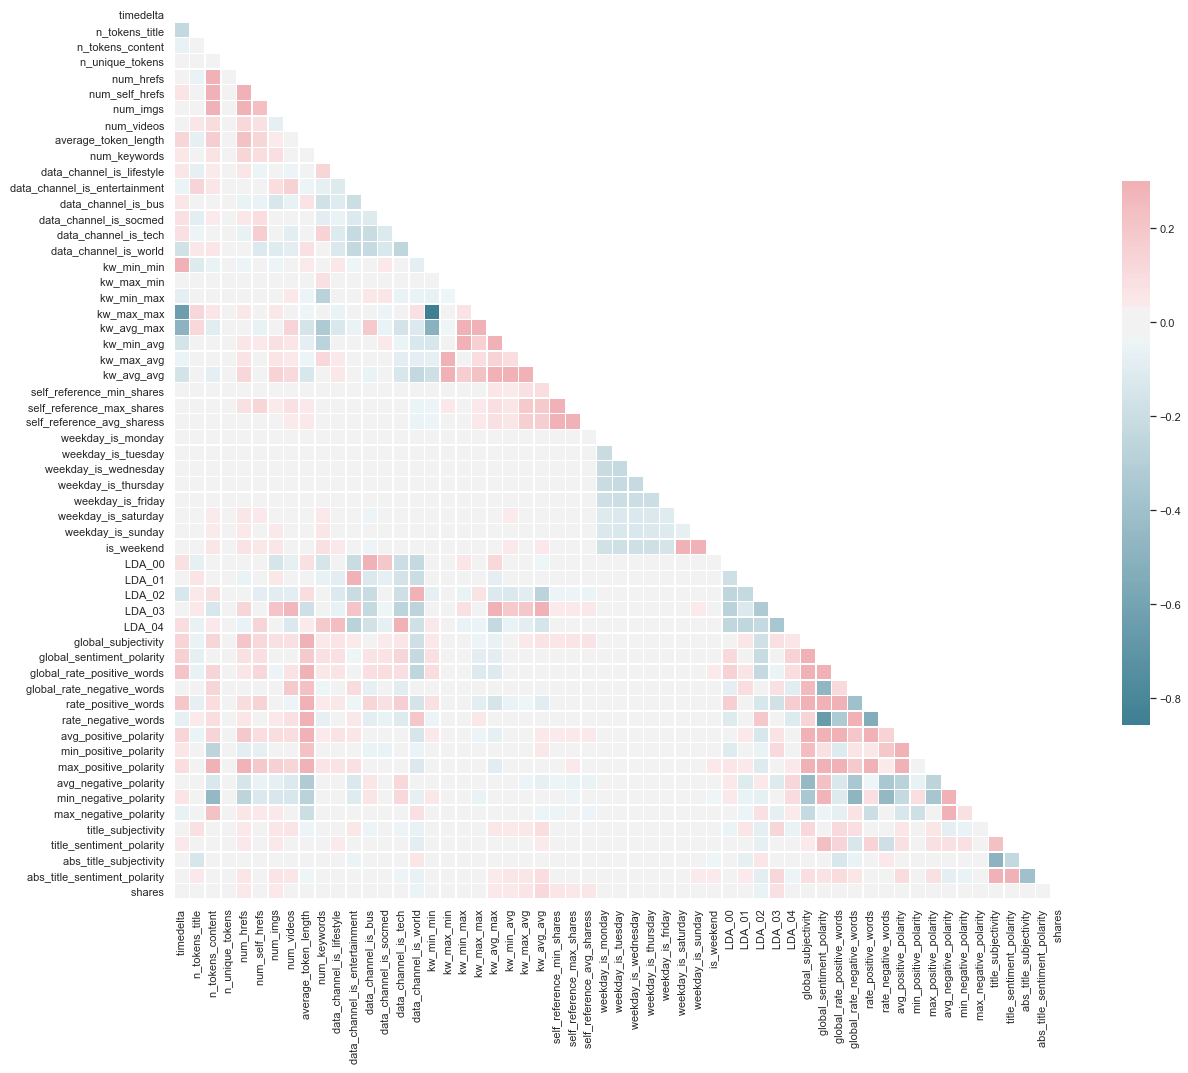

In [46]:
sns.set(style="white")
f = plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},mask=np.triu(np.ones_like(data.corr(), dtype=np.bool)))

### 2.2 Split data and under sample

In [11]:
#create target
upper_cut_off = data[' shares'].quantile(.75)  #calculate the median of shares, which will be used as the cut off value later
lower_cut_off = data[' shares'].quantile(.25)

data['popularity'] = data[' shares'].apply(lambda x: 1 if x >= upper_cut_off else 0 if x <= lower_cut_off else 3) #1 indicates this post is polular while 0 indicates this post is not popular

In [12]:
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,3
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [13]:
X = data.iloc[:,:-2]
y = data.iloc[:,-1]
X.rename(columns = lambda x: x.strip(),inplace = True)

In [14]:
#X=X[['timedelta','n_tokens_title','num_hrefs','average_token_length','data_channel_is_entertainment','kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','global_subjectivity','max_negative_polarity']] #select features manually. 
#let's use the full dataset first
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 666)


In [15]:
index_to_keep = data.index[data.popularity != 3]
keep = []
for i in X_train.index:
    if i in index_to_keep:
        keep.append(True)
    else:
        keep.append(False)
keep = np.array(keep)
keep

array([False, False,  True, ...,  True, False, False])

In [16]:
X_train = X_train.iloc[keep,:] #get rid of observations between 25% quantile and 75%quantile to make our classifiers more sensitive
y_train = y_train[keep]

In [53]:
scaler= MinMaxScaler()  
scaler.fit(X_train,y_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [54]:
X_train_under = X_train_standard[:5000,:]
y_train_under = y_train[:5000]  #delete later

In [55]:
median_ = data[' shares'].quantile(.5)

In [56]:
df = data.iloc[y_test[y_test == 3].index,:][[' shares','popularity']]

In [57]:
df.loc[df[' shares']>=median_,'popularity'] = 1
df.loc[df[' shares']<=median_,'popularity'] = 0
df.head()

,shares,popularity
31314,978,0
34087,1000,0
5159,1200,0
14572,1700,1
22445,1100,0


In [58]:
y_test[y_test == 3] = df.popularity #label observations that classified as 3 previously

In [59]:
df_plot = pd.concat([X[['timedelta','n_tokens_title','num_hrefs','average_token_length','data_channel_is_entertainment','kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','global_subjectivity','max_negative_polarity']],y],axis = 1).iloc[:500,]
df_plot.head()

,timedelta,n_tokens_title,num_hrefs,average_token_length,data_channel_is_entertainment,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,global_subjectivity,max_negative_polarity,popularity
0,731.0,12.0,4.0,4.680365,1.0,0.0,0.0,0.0,496.0,0.521617,-0.200000,0
1,731.0,9.0,3.0,4.913725,0.0,0.0,0.0,0.0,0.0,0.341246,-0.100000,0
2,731.0,9.0,3.0,4.393365,0.0,0.0,0.0,0.0,918.0,0.702222,-0.133333,3
3,731.0,9.0,9.0,4.404896,1.0,0.0,0.0,0.0,0.0,0.429850,-0.166667,3
4,731.0,13.0,19.0,4.682836,0.0,0.0,0.0,0.0,545.0,0.513502,-0.050000,0


C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


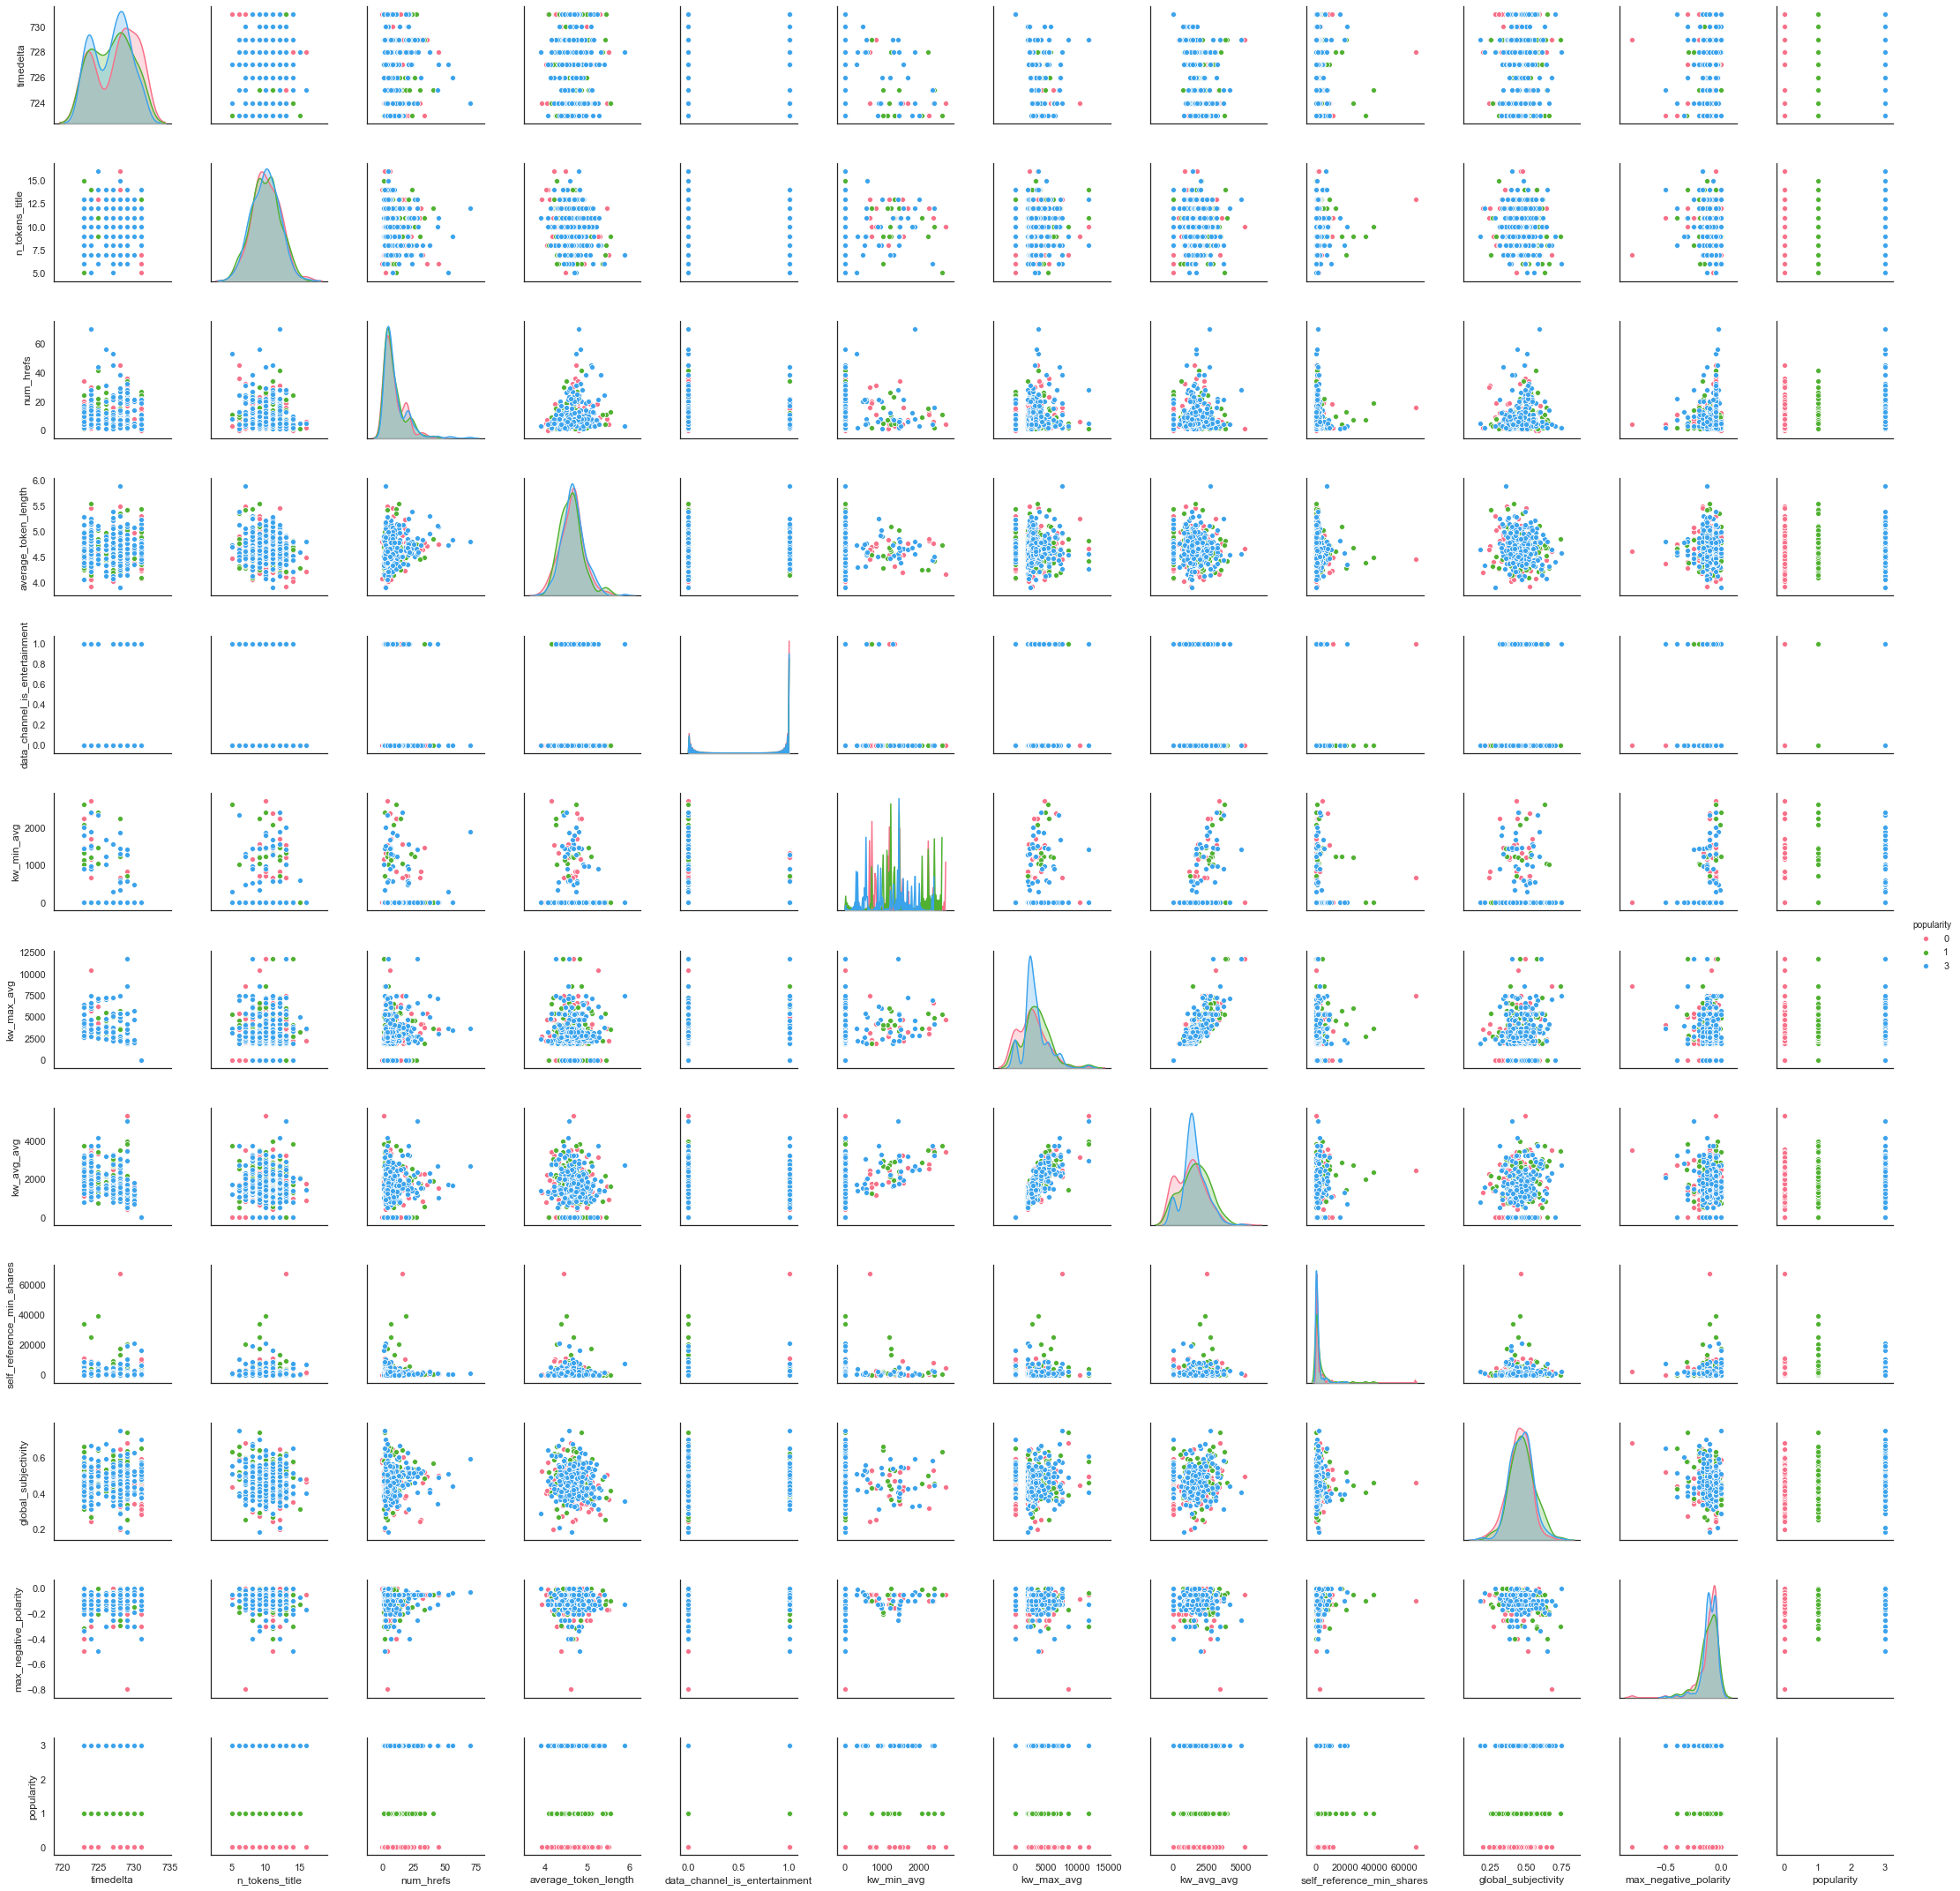

In [60]:
sns.pairplot(df_plot,hue = 'popularity',palette="husl")

## 3. Build classification models

### 3.1 Classification - Model instantiation

In this project, the classifiers to be used include:

- Logistic regression classifier,
- Support vector classifier,
- KNN,
- XGboost

We decided to evaluate the performace of our classifeirs by using accuarcy score and AUC.

In [61]:
def classifier(estimator,X_train,y_train,X_test,y_test,gridsearch = False, parameters = False):
    estimator.fit(X_train,y_train)
    if gridsearch == False:
        y_predict = estimator.predict(X_test)
        print('Test accuracy: ',accuracy_score(y_test,y_predict))
        print("-"*120)
    else:
        grid_searchCV = GridSearchCV(estimator,param_grid=parameters,cv=5,scoring='roc_auc',n_jobs=-1) 
        grid_searchCV.fit(X_train,y_train)
        y_predict = grid_searchCV.best_estimator_.predict(X_test)
        print('Best parameters: ',grid_searchCV.best_params_)
        print('Best ROC_AUC score: ',grid_searchCV.best_score_)
        print('Test accuracy: ',accuracy_score(y_test,y_predict))
        print('Test precision: ',precision_score(y_test,y_predict))
        print("-"*120)
    
    plt.figure(figsize = (13,6))    
    grid = plt.GridSpec(4,12, wspace=0.5, hspace=0.5)
    
    confusion_matrix_ax = plt.subplot(grid[2:5,0:3])
    confusion_matrix_ax.set_title('Confusion Matrix')
    confusion_matrix_ax.set_xlabel('Predict')
    confusion_matrix_ax.set_ylabel('Actual')
    sns.heatmap(confusion_matrix(y_test,y_predict)/np.sum(confusion_matrix(y_test,y_predict)), 
                annot=True,cmap='Blues',fmt='.2%',ax = confusion_matrix_ax)
    main_ax = plt.subplot(grid[0:4,4:12])
    fpr,tpr,threshold = roc_curve(y_test,y_predict)
    roc_auc = auc(fpr,tpr)
   
    lw = 2
   
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
#we can edit this function later

**Logistic regression**

Logistic regression is a commonly used supervised machine learning algrithem to classify data points into different catagories. The name _Logistic Regression_ indicates that the underlying technique is derived from linear regression, namely, logistic regression is a generalized linear regression. 

Test accuracy:  0.6363980325387817
------------------------------------------------------------------------------------------------------------------------


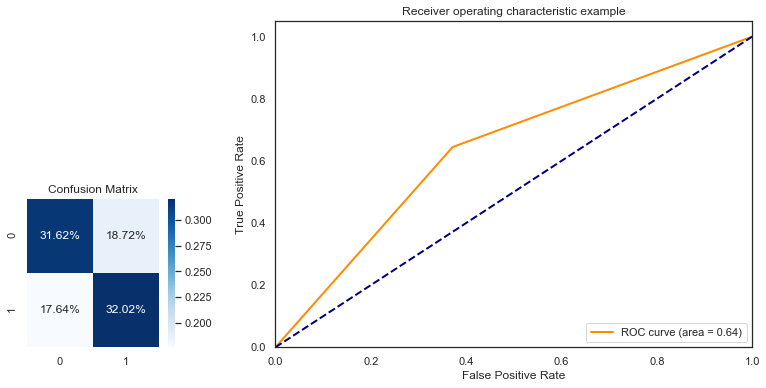

In [62]:
logistic = LogisticRegression(solver ='saga',max_iter=1000000) # model setup
classifier(logistic,X_train_under,y_train_under,X_test_standard,y_test,gridsearch = False, parameters = False)

In [ ]:
parameters = {
    'penalty':['l2','l1'],
    'C':[0.1,0.5,1.0,5,10,100]    
}
classifier(logistic,X_train_under,y_train_under,X_test_standard,y_test,gridsearch = True, parameters = parameters )

We do not know whether the true decision boundary is linear. What we are going to do next is to add polynomial features to the original dataset, and fit a model on the new dataset so as to make the decision boundary non-linear.

In [317]:
def poly_logistic(degree=1):
    return Pipeline(
    [('poly',PolynomialFeatures(degree = degree)),
    ('logistic',LogisticRegression(solver ='saga',max_iter=1000000))]
    )

In [318]:
poly_log = poly_logistic()

Best parameters:  {'logistic__C': 1.0, 'logistic__penalty': 'l1', 'poly__degree': 2}
Best ROC_AUC score:  0.7758524197082053
Test accuracy:  0.6448480262328162
Test precision:  0.6451112260734609
------------------------------------------------------------------------------------------------------------------------


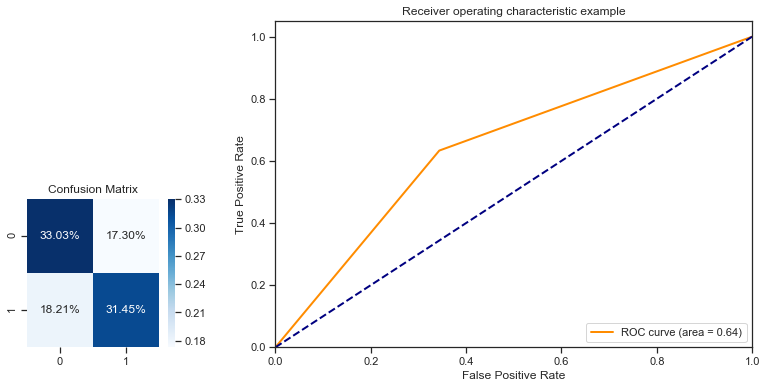

In [319]:
parameters = {
    'poly__degree':[1,2],
    'logistic__penalty':['l1','l2'],
    'logistic__C':[0.1,0.5,1.0,5,10,100] #tune this parameter later
}
classifier(poly_log,X_train_under,y_train_under,X_test_standard,y_test,gridsearch = True, parameters = parameters )

**SVC**

Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best ROC_AUC score:  0.7643718502190477
Test accuracy:  0.6396771345693025
Test precision:  0.6402803010641059
------------------------------------------------------------------------------------------------------------------------


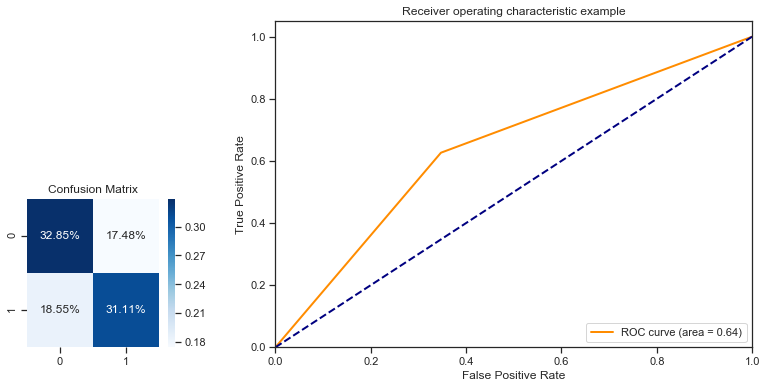

In [320]:
#model set up
svc = SVC(gamma='auto',cache_size= 11000)
parameters = {'gamma':[0.1,1,5,10],
    'kernel':['rbf'],
    'C':[1,5,10,20,50],     
}
classifier(svc,X_train_under,y_train_under,X_test_standard,y_test,gridsearch = True, parameters = parameters )

### 3.2 Regression - Model instantiation

In [2]:
data = pd.read_csv('onp.csv')
data.head()

,timedelta,n_tokens_title,num_hrefs,average_token_length,data_channel_is_entertainment,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,global_subjectivity,max_negative_polarity,shares
0,731,12,4,4.680365,1,0.0,0.0,0.0,496.0,0.521617,-0.200000,593
1,731,9,3,4.913725,0,0.0,0.0,0.0,0.0,0.341246,-0.100000,711
2,731,9,3,4.393365,0,0.0,0.0,0.0,918.0,0.702222,-0.133333,1500
3,731,9,9,4.404896,1,0.0,0.0,0.0,0.0,0.429850,-0.166667,1200
4,731,13,19,4.682836,0,0.0,0.0,0.0,545.0,0.513502,-0.050000,505


In [15]:
data.describe().iloc[:,0:11] 

,timedelta,n_tokens_title,num_hrefs,average_token_length,data_channel_is_entertainment,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,global_subjectivity,max_negative_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,10.883690,4.548239,0.178009,1117.146610,5657.211151,3135.858639,3998.755396,0.443370,-0.107500
std,214.163767,2.114037,11.332017,0.844406,0.382525,1137.456951,6098.871957,1318.150397,19738.670516,0.116685,0.095373
min,8.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,164.000000,9.000000,4.000000,4.478404,0.000000,0.000000,3562.101631,2382.448565,639.000000,0.396167,-0.125000
50%,339.000000,10.000000,8.000000,4.664082,0.000000,1023.635611,4355.688836,2870.074878,1200.000000,0.453457,-0.100000
75%,542.000000,12.000000,14.000000,4.854839,0.000000,2056.781031,6019.953968,3600.229564,2600.000000,0.508333,-0.050000
max,731.000000,23.000000,304.000000,8.041534,1.000000,3613.039820,298400.000000,43567.659950,843300.000000,1.000000,0.000000


In [3]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 666)
scaler= MinMaxScaler()  #using minmax scaler to normalize dataset
scaler.fit(X_train,y_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [4]:
def test_RMSE(model,X_test,y_test):
    y_predict = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test,y_predict))

In [16]:
def RidgeRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [6]:
def LassoRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [7]:
def Rsquare():
    MSE=np.sum(np.power((testY-predicY),2))/len(testY)
    R2=1-MSE/np.var(testY)
    print("R2:", R2)

**linear regression**

In [8]:
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)
test_RMSE(regr,X_train,y_train)

12192.201801151565

In [9]:
predicY=regr.predict(X_train)
testY=y_train
Rsquare()

R2: 0.017917942374873652


**Poisson**

In [10]:
#Poisson Regression
import statsmodels.api as sm
poisson_training_results=sm.GLM(y_train,X_train_standard,family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 shares   No. Observations:                31715
Model:                            GLM   Df Residuals:                    31705
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1355e+08
Date:                Mon, 06 Jul 2020   Deviance:                   2.2680e+08
Time:                        15:06:54   Pearson chi2:                 1.78e+09
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7270      0.001   1915.468      0.0

In [11]:
poisson_predictions=poisson_training_results.get_prediction(X_train_standard)
predictions_summary_frame=poisson_predictions.summary_frame()

In [12]:
y_predict=predictions_summary_frame['mean']
#RMSE
np.sqrt(mean_squared_error(y_train,y_predict)) 

12796.929520747979

In [13]:
testY=y_train
predicY=predictions_summary_frame['mean']
Rsquare()

R2: 0.044230189109403906


**Ridge**

In [17]:
#try ridge regression. Do not run this cell if you're not confident with the computational power of your machine.

ridge = RidgeRegression(degree = 1,alpha = 1) #It's computationally intensive if degree is higer than 2 since we have over 50 features.
ridge.fit(X_train,y_train)
para = {
        'poly__degree':[1,2],
    'ridge_reg__alpha':[0.1,0.5,1,2,5]}
ridge_GS = GridSearchCV(ridge,param_grid=para,cv=5,scoring='r2',n_jobs=-1)
ridge_GS.fit(X_test,y_test)
test_RMSE(ridge_GS,X_test,y_test) #poor performance

8225.785232176675

In [18]:
predicY=ridge_GS.predict(X_test)
testY=y_test
Rsquare()

R2: 0.03956033075307697


**Lasso**

In [19]:
#Do not run this cell if you're not confident with the computational power of your machine.
lasso = LassoRegression(degree = 1,alpha = 1)
lasso.fit(X_train,y_train)
para = {
        'poly__degree':[1,2],
    'lasso_reg__alpha':[0.1,0.5,1,2,5]       
}
lasso_GS = GridSearchCV(lasso,param_grid=para,cv=5,scoring='r2',n_jobs=-1)
lasso_GS.fit(X_test,y_test) 
test_RMSE(lasso_GS,X_test,y_test) #poor performance

8226.114756471543

In [20]:
predicY=lasso_GS.predict(X_test)
testY=y_test
Rsquare()

R2: 0.03948337893994702


## 4. Dimensionally reduction techniques

Try dimensionally reduction techniques to see if there's any improvements. 

- Visualization
- Run models over a dimensionality reduction Dataset to see wheher we can achieve a balance between model performance and timing issue.

In [29]:
pca = PCA()
pca.fit(X_train_under)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

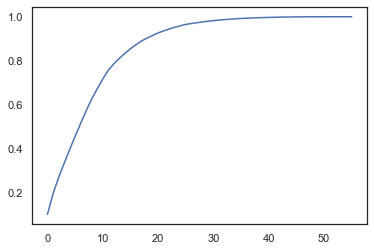

In [30]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [31]:
pca = PCA(n_components=2) #for visualization
pca.fit(X_train_under)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
X_train_reduction = pca.transform(X_train_under)
X_test_reduction = pca.transform(X_test_standard)

In [33]:
X_train_reduction[:,0][y_train_under == 0]

array([-0.1691131 , -0.01926879, -0.35206259, ..., -0.5906784 ,
       -0.19880384, -0.01858243])

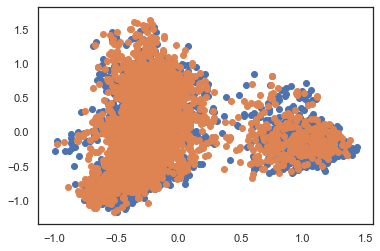

In [34]:
plt.scatter(X_train_reduction[:,0][y_train_under == 0],X_train_reduction[:,1][y_train_under == 0])
plt.scatter(X_train_reduction[:,0][y_train_under == 1],X_train_reduction[:,1][y_train_under == 1])
plt.show()

PCA and logistic regression

In [335]:
logistic = LogisticRegression(solver ='saga',max_iter=1000000) 
logistic.fit(X_train_reduction,y_train_under)
y_predict = logistic.predict(X_test_reduction)
print('accuracy: ',accuracy_score(y_test,y_predict))
print('auc: ',roc_auc_score(y_test,y_predict))

accuracy:  0.5555555555555556
auc:  0.556339975966748


In [336]:
#tuning hyper parameters
parameters = {
    'penalty':['l2','l1'],
    'C':[0.1,0.5,1.0,5,10,100]
    
}
grid_searchCV = GridSearchCV(logistic,param_grid=parameters,cv=5,scoring='roc_auc',n_jobs=-1) 
grid_searchCV.fit(X_train_reduction,y_train_under)
y_predict = grid_searchCV.best_estimator_.predict(X_test_reduction)
print('best para: ',grid_searchCV.best_params_)
print('best auc: ',grid_searchCV.best_score_)
print('test accuracy',accuracy_score(y_test,y_predict))
print('test precision',precision_score(y_test,y_predict))

best para:  {'C': 10, 'penalty': 'l2'}
best auc:  0.6151058259401088
test accuracy 0.5555555555555556
test precision 0.5423139820114473


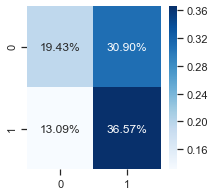

In [332]:
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test,y_predict)/np.sum(confusion_matrix(y_test,y_predict)), annot=True,cmap='Blues',fmt='.2%')
plt.show()

PCA and SVC

Run a SVC over a dimensionality reduction Dataset to see wheher we can achieve a balance between model performance and timing issue.

In [219]:
#model set up
svc = SVC(gamma='auto',cache_size= 11000)
svc.fit(X_train_reduction,y_train_under)
y_predict = svc.predict(X_test_reduction)
print('accuracy: ',accuracy_score(y_test,y_predict))
print('auc: ',roc_auc_score(y_test,y_predict))

accuracy:  0.6210114768571068
auc:  0.6212988874536015


best para:  {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
best auc:  0.7150363945403556
test accuracy 0.6245428175053601
test precision 0.6120830417541404


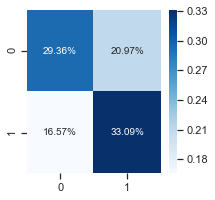

In [220]:
parameters = {'gamma':[0.1,1,5,10],
    'kernel':['rbf'],
    'C':[1,5,10,20,50],     #try polynomial kernal and rbf kernal later
}
grid_searchCV = GridSearchCV(svc,param_grid=parameters,cv=5,scoring='roc_auc',n_jobs=-1) #tuning parameters
grid_searchCV.fit(X_train_reduction,y_train_under)
y_predict = grid_searchCV.best_estimator_.predict(X_test_reduction)
print('best para: ',grid_searchCV.best_params_)
print('best auc: ',grid_searchCV.best_score_)
print('test accuracy',accuracy_score(y_test,y_predict))
print('test precision',precision_score(y_test,y_predict))
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test,y_predict)/np.sum(confusion_matrix(y_test,y_predict)), annot=True,cmap='Blues',fmt='.2%')
plt.show()

Does not outperforms the original model, but runs much faster.